# Paraboloidal pendulum

## System definition

In [2]:
import numpy as np

In [3]:
var('t')
var('l g')
xy_names = [('x','x'),('y','y'),('z','z')]
load('cas_utils.sage')
to_fun, to_var = make_symbols(xy_names)
xy = [vars()[v] for v,lv in xy_names]

x  :: has been  processed
y  :: has been  processed
z  :: has been  processed


In [4]:
dAlemb = (x.subs(to_fun).diff(t,2))*dx + \
         (y.subs(to_fun).diff(t,2))*dy + \
         (z.subs(to_fun).diff(t,2)+g)*dz  
dAlemb = dAlemb.subs(to_var)

In [5]:
showmath(dAlemb)

<IPython.core.display.Math object>

In [6]:
f = 1/2*(x^2+y^2)-z
dxy = [vars()['d'+repr(zm)] for zm in xy]

constr =sum([dzm*f.diff(zm) for zm,dzm in zip(xy,dxy)])
showmath(constr)

<IPython.core.display.Math object>

In [7]:
eq1=(dAlemb.subs(constr.solve(dz)[0])*x).expand().coefficient(dx).subs(to_var)
eq2=(dAlemb.subs(constr.solve(dz)[0])*x).expand().coefficient(dy).subs(to_var)

showmath([eq1,eq2])

<IPython.core.display.Math object>

In [19]:
sol = solve([f.subs(to_fun).diff(2).subs(to_var),eq1,eq2],[xdd,ydd,zdd])[0][:2]

In [20]:
showmath(sol)

<IPython.core.display.Math object>

In [24]:
ode = [xd,yd] + [s_.rhs() for s_ in sol]

## Numerical analysis

In [25]:
ode = map(lambda x:x.subs({l:1,g:1}),ode)
showmath(ode)

<IPython.core.display.Math object>

In [26]:
times = srange(0,237,.1)

In [27]:
z_prime = (1/2*(x^2+y^2)).subs(to_fun).diff(t).subs(to_var)
z_prime.show()

x*xd + y*yd

In [28]:
Ekin = (1/2*(xd^2+yd^2+z_prime^2))

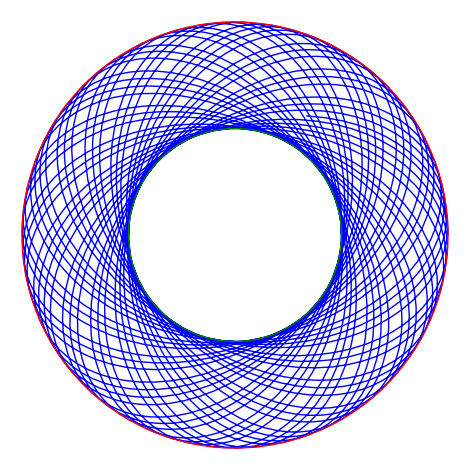

In [29]:
numsol = desolve_odeint(ode,[1.0,0,0.,.5],times,[x,y,xd,yd])
p = line ( zip(numsol[:,0],numsol[:,1]) )
Epot = 1/2*(numsol[:,0]^2+numsol[:,1]^2)
p += circle( (0,0), sqrt(np.max(2*Epot)),color='red' )
p += circle( (0,0), sqrt(np.min(2*Epot)),color='green' )
p.show(aspect_ratio=1,axes=False)

In [30]:
Ekin_num = [Ekin.subs({x:d[0],y:d[1],xd:d[2],yd:d[3]}) for d in numsol]
Epot_num  = 1/2*(numsol[:,0]^2+numsol[:,1]^2) # g=1!

In [36]:
Ekin_num + Epot_num

array([0.625, 0.6249999943305325, 0.6249999979623393, ...,
       0.625004240168609, 0.6250042526868687, 0.6250042649374952],
      dtype=object)

## Angular momentum

We can calculate symbolically angular momentum and chech if its $z$-component is conserved in time.

In [53]:
var('x y', domain='real')

#e_r = vector([x,y,0])
#v = vector([xd,yd,0])

e_r = vector([x,y,1/2*(x^2+y^2)])
v = vector([xd,yd,z_prime])

In [54]:
p = e_r.cross_product(v)

In [55]:
showmath(p[0].full_simplify())

<IPython.core.display.Math object>

In [56]:
Ekin_num = [Ekin.subs({x:d[0],y:d[1],xd:d[2],yd:d[3]}) for d in numsol]

In [57]:
P_num = [(p[2]).subs({x:d[0],y:d[1],xd:d[2],yd:d[3]}) for d in numsol]


In [58]:
P_num[0]

0.5

In [59]:
Ekin.subs( (p[2]*x*y).expand().solve(xd)[0]*x).expand().show()

x^2*yd^2 + 1/2*x^4*yd^2/y^2 + 1/2*y^2*yd^2 + 1/2*xd^2 + 1/2*yd^2

In [60]:
Ekin.show()

1/2*(x*xd + y*yd)^2 + 1/2*xd^2 + 1/2*yd^2

In [62]:
P_num[:4]

[0.5, 0.4999999909879266, 0.49999999698576963, 0.4999999949420133]

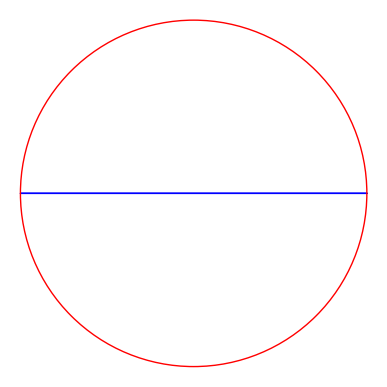

In [65]:
@interact 
def plot2d_traj(v0=slider(0,3,0.001)):
    numsol = desolve_odeint(ode,[1,0,0,v0],times,[x,y,xd,yd])
    p = line( zip(numsol[:,0],numsol[:,1]), aspect_ratio=1)
    p += circle( (0,0),1,color='red')
    p.show(axes=False)

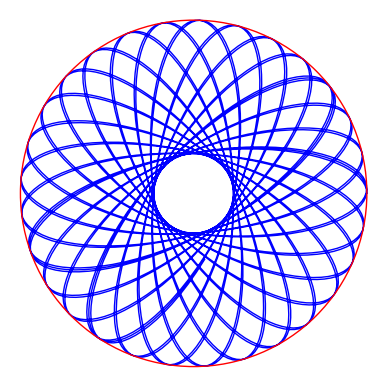

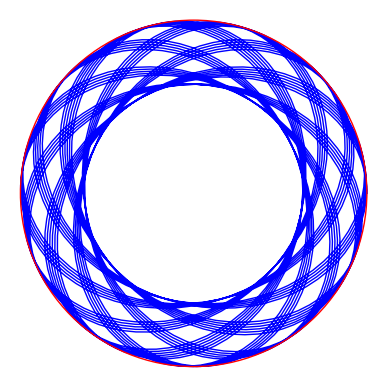

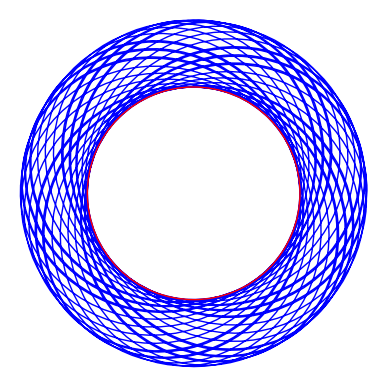

(None, None, None)

In [68]:
plot2d_traj(v0=0.23),plot2d_traj(v0=0.63),plot2d_traj(v0=1.63),

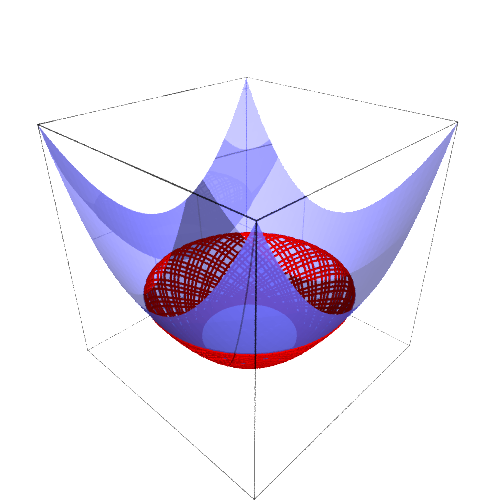

In [69]:
p3d = line3d( zip(numsol[:,0],numsol[:,1],(1/2*(numsol[:,0]**2+numsol[:,1]**2))),thickness=2,color='red')
p3d += plot3d(1/2*(x^2+y^2),(x,-1.2,1.2),(y,-1.2,1.2),opacity=0.8) 
p3d.show(viewer='tachyon')

\newpage